.

# Project: Investigate a Dataset (Medical Appointment)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> Medical Appointment No Shows dataset collects information from 100k medical appointments in Brazil. this data focused on the question of whether or not patients show up for their appointment.

<dt>Data Dictionary</dt> based on original dataset in [Kaggle] 

>
<dt>Questions</dt>
<dd>1-  What is the age average of patients infected and not infected with Hypertension?</dt>
<dd>2- Number of Patients who have the Scholarship and number of those who did not have a Scholarship</dt>
<dd>3- what is Age range of patients visiting the medical.</dt>
<dd>4- what is the Number of Patients who received SMS and the number of those who did not receiv the SMS.</dt>
<dd>5- AComparison between Patients show up or not.</dt>


> We need to import some useful modules that we are going to use in this project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib.ticker as mtick

<a id='wrangling'></a>
## Data Wrangling

> In this section we are going to clean ,unify messy and complex data sets for easy access and analysis.

### General Properties

In [2]:
# Load the data and print out a few lines. 
df_show = pd.read_csv('noshowappointments.csv')
df_show.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df_show.shape

(110527, 14)

In [4]:
df_show.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [5]:
df_show.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


> <dd> * The dataset contains no mising values</dt>
  <dd> * the PatientId and AppointmentID should be in object data type</dt>
  <dd> * The ScheduledDay and AppointmentDay should be in DateTime data type</dt>

### Data Cleaning 

> We need to Remove and renaming incorrect data

In [6]:
# Rename columns name
df_show.rename(columns = {'Handcap':'Handicap',
    'Hipertension':'Hypertension','No-show':'No_show'}, inplace = True)

print(df_show.columns)

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'No_show'],
      dtype='object')


> checking for enterd value

In [7]:
print('Age:->> ',df_show.Age.unique())
print ( )
print('Scholarship:->> ',df_show.Scholarship.unique())
print ( )
print('SMS Received:->> ',df_show.SMS_received.unique())
print ( )
print('Alcoholism:->> ',df_show.Alcoholism.unique())
print ( )
print('Hypertension:->> ',df_show.Hypertension.unique())
print ( )
print('Handicap:->> ',df_show.Handicap.unique())
print ( )
print('Gender:->>',df_show.Gender.unique())
print ( )
print('Diabetes:->> ',df_show.Diabetes.unique())
print ( )
print('No Show:->> ',df_show.No_show.unique())

Age:->>  [ 62  56   8  76  23  39  21  19  30  29  22  28  54  15  50  40  46   4
  13  65  45  51  32  12  61  38  79  18  63  64  85  59  55  71  49  78
  31  58  27   6   2  11   7   0   3   1  69  68  60  67  36  10  35  20
  26  34  33  16  42   5  47  17  41  44  37  24  66  77  81  70  53  75
  73  52  74  43  89  57  14   9  48  83  72  25  80  87  88  84  82  90
  94  86  91  98  92  96  93  95  97 102 115 100  99  -1]

Scholarship:->>  [0 1]

SMS Received:->>  [0 1]

Alcoholism:->>  [0 1]

Hypertension:->>  [1 0]

Handicap:->>  [0 1 2 3 4]

Gender:->> ['F' 'M']

Diabetes:->>  [0 1]

No Show:->>  ['No' 'Yes']


> As wee can see above in Age column there is wrong value wich is -1
>> So we need to limit the Age 

In [75]:
# Limiting the age inside the outlier
df_show = df_show[(df_show.Age > 0) & (df_show.Age <= 100)]

print('Age:->> ',df_show.Age.unique())
print('The shape:->> ',df_show.shape)

Age:->>  [ 62  56   8  76  23  39  21  19  30  29  22  28  54  15  50  40  46   4
  13  65  45  51  32  12  61  38  79  18  63  64  85  59  55  71  49  78
  31  58  27   6   2  11   7   3   1  69  68  60  67  36  10  35  20  26
  34  33  16  42   5  47  17  41  44  37  24  66  77  81  70  53  75  73
  52  74  43  89  57  14   9  48  83  72  25  80  87  88  84  82  90  94
  86  91  98  92  96  93  95  97 100  99]
The shape:->>  (106980, 16)


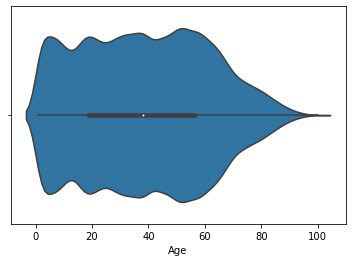

In [76]:
sns.violinplot(x="Age", data=df_show);

> The violinplot above shows the distribution of the patients ages in a given dataset. We can infer from the plot above majority of the patients fall between the age range of 0-100.

In [9]:
print(df_show.isnull().sum())


PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hypertension      0
Diabetes          0
Alcoholism        0
Handicap          0
SMS_received      0
No_show           0
dtype: int64


In [10]:
print(df_show.duplicated().sum()) 

0


> the PatientId and AppointmentID should be in object data type

In [11]:
df_show['PatientId'] = df_show['PatientId'].astype(str)
df_show['PatientId'].dtypes

dtype('O')

In [12]:
df_show['AppointmentID'] = df_show['AppointmentID'].astype(str)
df_show['AppointmentID'].dtypes

dtype('O')

> The ScheduledDay and AppointmentDay should be in DateTime data type

In [13]:
df_show['ScheduledDay'] =  pd.to_datetime(df_show['ScheduledDay'], format='%Y-%m-%dT%H:%M:%SZ')
df_show['AppointmentDay'] =  pd.to_datetime(df_show['AppointmentDay'], format='%Y-%m-%dT%H:%M:%SZ')


In [14]:
df_show.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,29872499824296.0,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438.0,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951.0,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174.0,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183.0,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis

> Now we have done from cleaning data, we are ready to Explor data analysis section.

> First, we need to look at our last dataframe that has been cleaned before.



In [15]:
df_show.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,29872499824296.0,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438.0,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951.0,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174.0,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183.0,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Q1 What is the age average of patients infected and not infected with Hypertension?

In [16]:
# show the age average of Patients with the Hypertension
pp= df_show.groupby('Hypertension').Age.mean()
print(pp)


Hypertension
0    32.604156
1    60.611101
Name: Age, dtype: float64


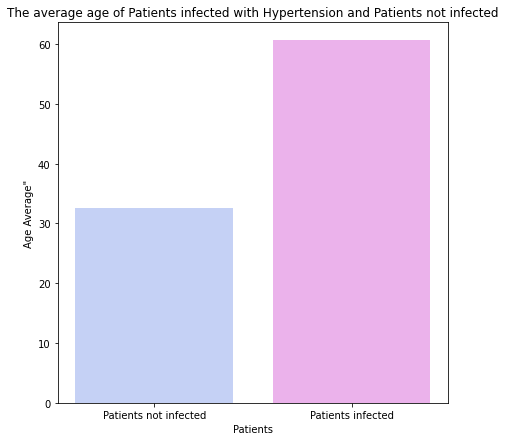

In [17]:
# Plotting the above with bar chart
plt.figure(figsize=(7, 7))
plt.bar(["Patients not infected", "Patients infected"], [pp[0], pp[1]], color =['royalblue','m'],alpha=0.3)
plt.title('The average age of Patients infected with Hypertension and Patients not infected')
plt.xlabel('Patients')
plt.ylabel('Age Average"');

> 0 means Patients not infected
>> 1 means Patients infected


### Q2 Number of Patients who have the Scholarship and number of those who did not have a Scholarship

In [18]:
Scholarship = df_show['Scholarship'].value_counts()
print(Scholarship)

0    96171
1    10809
Name: Scholarship, dtype: int64


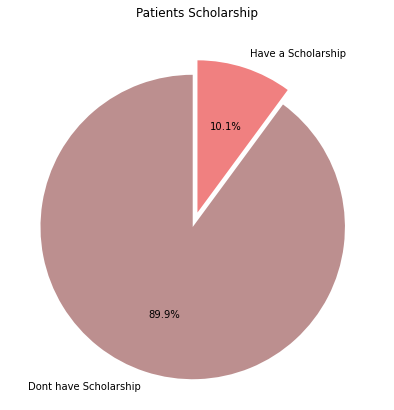

In [74]:
# Plotting the above with pie chart

labels = ['Dont have Scholarship', 'Have a Scholarship']
colors = ['green', 'red']
plt.figure(figsize=(7, 7))
plt.pie(Scholarship, labels=labels, startangle=90, explode=[0.1, 0],colors = ['rosybrown', 'lightcoral'], autopct='%.1f%%')
plt.title('Patients Scholarship')
plt.show()
                

> From the pie chart above, we can see that more than 89% percent of patients did not have a Scholarship and only 10.1% have the Scholarship.

### Higher age are more likely to "no-show"?

In [50]:
df_show['No_show'].value_counts()

No     85303
Yes    21677
Name: No_show, dtype: int64

In [51]:
#reate a mask to better visualizing this feature
showed = df_show['No_show'] == "No"
not_showed = df_show['No_show'] == "Yes"
df_show['showed'] = showed
df_show['not_showed'] = not_showed

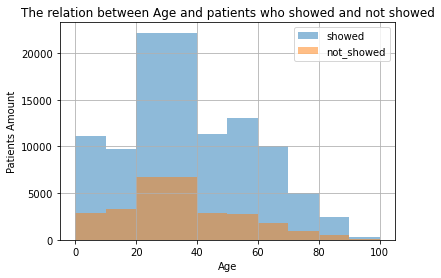

In [52]:
#generating the graph
df_show.Age[showed].hist(bins=[0, 10, 20, 20, 40, 50, 60, 70, 80, 90, 100], alpha=0.5, label='showed')
df_show.Age[not_showed].hist(bins=[0, 10, 20, 20, 40, 50, 60, 70, 80, 90, 100],alpha=0.5, label='not_showed');
plt.xlabel('Age')
plt.ylabel('Patients Amount')
plt.title('The relation between Age and patients who showed and not showed')
plt.legend();

> Apparently there is more "no- show" between ages 20-40 and less with ages 60-80

### Q3 Age range

In [53]:
df_show.describe().Age

count    106980.000000
mean         38.311311
std          22.459144
min           1.000000
25%          19.000000
50%          38.000000
75%          56.000000
max         100.000000
Name: Age, dtype: float64

<AxesSubplot:xlabel='Age'>

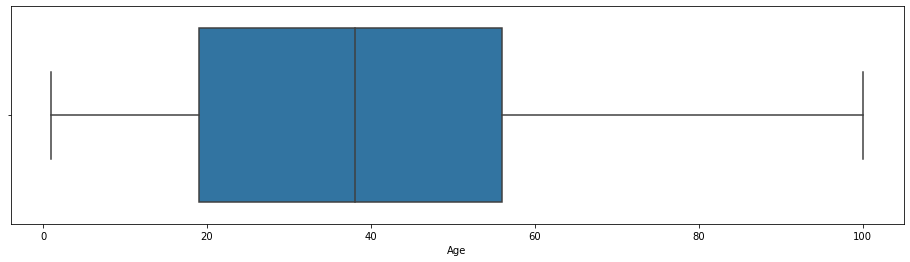

In [54]:
# Plotting the above with boxplot
plt.figure(figsize=(16, 4))
sns.boxplot(x=df_show.Age)

>  the above boxplot chart shows that the most age is between 19 and 56

### Q4  Number of Patients who received SMS and the number of those who did not receiv the SMS

In [55]:
sms = df_show.SMS_received.value_counts()
print(sms)

0    72396
1    34584
Name: SMS_received, dtype: int64


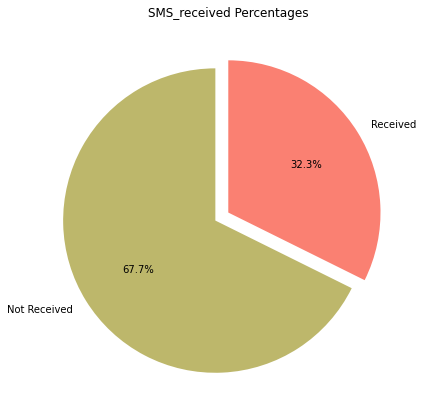

In [72]:
# Plotting the above with pie chart

labels = ['Not Received', 'Received']
plt.figure(figsize=(7, 7))
plt.pie(sms, labels=labels, startangle=90, explode=[0.1, 0], colors = ['darkkhaki', 'salmon'],autopct='%.1f%%')
plt.title('SMS_received Percentages')
plt.show()

> From the pie chart above, we can see that more than 67% percent of patients are not received sms and only 32.3% received the sms

### Q5 Comparison between Patients show up or not

In [71]:
show = df_show.No_show.value_counts()
print(show)

No     85303
Yes    21677
Name: No_show, dtype: int64


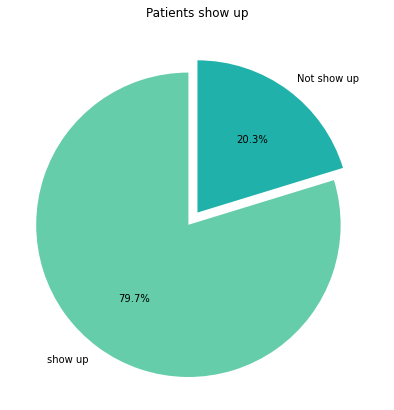

In [62]:
show = df_show.No_show.value_counts()
labels = ['show up', 'Not show up']
plt.figure(figsize=(7, 7))
plt.pie(show, labels=labels, startangle=90, explode=[0.1, 0],colors = ['mediumaquamarine', 'lightseagreen'], autopct='%.1f%%')
plt.title('Patients show up')
plt.show()

<a id='conclusions'></a>
## Conclusions

> <dt>Results:</dt> our data suggest that
 <dd>(1) </dt> Most patients infected with Hypertension are in 60 years old
 <dd>(2) </dt> There is a higher percentage of patients who did not enrolled in the Scholarship compared to patients who enrolled a Scholarship
 <dd>(3)</dt> 
 <dd>(4)</dt> Most agest visited the hospital is between 19 and 56


> <dt>Limitations:</dt>
<dd>(1)</dt> Most of our variables are categorical, which does not aloow for a high level of statistical method that can be used to provide correlations etc
<dd>(2)</dt> The statistics used here are descriptive statistics, not inferential, meaning that we did not create any hypotheses.